# Séance 1

Ce travail consiste à explorer les données espaces verts de la ville de Paris, dans sa dimension attributaire et spatiale.


## Configuration environnement de travail

In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install Geopandas
!pip install geopandas

In [ ]:
#Importation des librairies nécessaires
import pandas as pd #Gestion de données
import matplotlib.pyplot as plt #Visualisation de données
import geopandas as gpd #Gestion données sptiales
import os
import numpy as np
import shapely

## Exploration données Espaces Verts

In [ ]:
### Téléchargement de data

In [ ]:
#Téléchargement des datas depuis le site opendata de Paris
!wget -O Espacesverts.csv https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/espaces_verts/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B


--2024-03-08 14:17:43--  https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/espaces_verts/exports/csv?lang=fr
Resolving opendata.paris.fr (opendata.paris.fr)... 34.248.20.69, 34.249.199.226
Connecting to opendata.paris.fr (opendata.paris.fr)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘Espacesverts.csv’

Espacesverts.csv        [     <=>            ]  10.13M  7.81MB/s    in 1.3s    

2024-03-08 14:17:45 (7.81 MB/s) - ‘Espacesverts.csv’ saved [10618022]



In [ ]:
### preparation data

In [ ]:
#Importer CSV to dataframe

Espacesverts = pd.read_csv("Espacesverts.csv", sep=';')
Espacesverts.head(3)

,nsq_espace_vert,nom_ev,type_ev,categorie,adresse_numero,adresse_complement,adresse_typevoie,adresse_libellevoie,adresse_codepostal,poly_area,...,ouvert_ferme,id_division,id_atelier_horticole,ida3d_enb,site_villes,id_eqpt,competence,geom,url_plan,geom_x_y
0,11649.0,12-50,Périphérique,Talus,0.0,NaN,NaN,NaN,75016.0,488.0,...,NaN,9999.0,NaN,0,0,0,0,"{""coordinates"": [[[2.251595324018976, 48.85123...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
1,11658.0,13-00,Périphérique,Talus,0.0,NaN,NaN,NaN,75016.0,2333.0,...,NaN,9999.0,NaN,0,0,0,0,"{""coordinates"": [[[2.2611199542539713, 48.8587...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
2,11664.0,14-50,Périphérique,Talus,0.0,NaN,NaN,NaN,75016.0,137.0,...,NaN,9999.0,NaN,0,0,0,0,"{""coordinates"": [[[2.2635425077555755, 48.8609...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN


In [ ]:
#Checker les types de champs

Espacesverts.dtypes

nsq_espace_vert          float64
nom_ev                    object
type_ev                   object
categorie                 object
adresse_numero           float64
adresse_complement        object
adresse_typevoie          object
adresse_libellevoie       object
adresse_codepostal       float64
poly_area                float64
surface_totale_reelle    float64
surface_horticole        float64
presence_cloture          object
perimeter                float64
annee_ouverture          float64
annee_renovation         float64
ancien_nom_ev             object
annee_changement_nom     float64
nb_entites               float64
ouvert_ferme              object
id_division              float64
id_atelier_horticole     float64
ida3d_enb                 object
site_villes               object
id_eqpt                   object
competence                object
geom                      object
url_plan                  object
geom_x_y                 float64
dtype: object

### Structuration de table



In [ ]:
#Compter le nombre d'enregistrements
Espacesverts['nsq_espace_vert'].size

2300

In [ ]:
#Réorganiser la table (sélection des colonnes importantes)

EspacesvertsOk = Espacesverts[["nsq_espace_vert", "nom_ev", "type_ev", "categorie", "adresse_codepostal", "surface_totale_reelle", "annee_ouverture"]]
EspacesvertsOk.head()

,nsq_espace_vert,nom_ev,type_ev,categorie,adresse_codepostal,surface_totale_reelle,annee_ouverture
0,11649.0,12-50,Périphérique,Talus,75016.0,NaN,NaN
1,11658.0,13-00,Périphérique,Talus,75016.0,NaN,NaN
2,11664.0,14-50,Périphérique,Talus,75016.0,NaN,NaN
3,11677.0,15-07,Périphérique,Talus,75016.0,NaN,NaN
4,11681.0,15-12,Périphérique,Talus,75016.0,NaN,NaN


In [ ]:
# Renommer les noms des champs

EspacesvertsOk.rename(columns={'nsq_espace_vert': 'id','nom_ev': 'nom', 'type_ev': 'type', 'adresse_codepostal': 'CodePostal', 'surface_totale_reelle' : 'surface', 'annee_ouverture': 'annee'}, inplace=True)
EspacesvertsOk.head()

<ipython-input-111-93a2e0562013>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EspacesvertsOk.rename(columns={'nsq_espace_vert': 'id','nom_ev': 'nom', 'type_ev': 'type', 'adresse_codepostal': 'CodePostal', 'surface_totale_reelle' : 'surface', 'annee_ouverture': 'annee'}, inplace=True)


,id,nom,type,categorie,CodePostal,surface,annee
0,11649.0,12-50,Périphérique,Talus,75016.0,NaN,NaN
1,11658.0,13-00,Périphérique,Talus,75016.0,NaN,NaN
2,11664.0,14-50,Périphérique,Talus,75016.0,NaN,NaN
3,11677.0,15-07,Périphérique,Talus,75016.0,NaN,NaN
4,11681.0,15-12,Périphérique,Talus,75016.0,NaN,NaN


In [ ]:
# Format de colonnes
EspacesvertsOk.dtypes

id            float64
nom            object
type           object
categorie      object
CodePostal    float64
surface       float64
annee         float64
dtype: object

In [ ]:
#Suprresions des lignes avec des na
EspacesvertsOk = EspacesvertsOk.dropna(subset=['id'])

In [ ]:
#Changer le type d'une colonne --> passer de float a str
EspacesvertsOk['id'] = EspacesvertsOk['id'].astype(int)
EspacesvertsOk['id'] = EspacesvertsOk['id'].astype(str)
EspacesvertsOk.head(5)

<ipython-input-114-27ac60473b25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EspacesvertsOk['id'] = EspacesvertsOk['id'].astype(int)
<ipython-input-114-27ac60473b25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EspacesvertsOk['id'] = EspacesvertsOk['id'].astype(str)


,id,nom,type,categorie,CodePostal,surface,annee
0,11649,12-50,Périphérique,Talus,75016.0,NaN,NaN
1,11658,13-00,Périphérique,Talus,75016.0,NaN,NaN
2,11664,14-50,Périphérique,Talus,75016.0,NaN,NaN
3,11677,15-07,Périphérique,Talus,75016.0,NaN,NaN
4,11681,15-12,Périphérique,Talus,75016.0,NaN,NaN


In [ ]:
EspacesvertsOk['CodePostal'] = EspacesvertsOk['CodePostal'].astype(int)
EspacesvertsOk['CodePostal'] = EspacesvertsOk['CodePostal'].astype(str)
EspacesvertsOk.head(5)

<ipython-input-115-3a7af6721df5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EspacesvertsOk['CodePostal'] = EspacesvertsOk['CodePostal'].astype(int)
<ipython-input-115-3a7af6721df5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EspacesvertsOk['CodePostal'] = EspacesvertsOk['CodePostal'].astype(str)


,id,nom,type,categorie,CodePostal,surface,annee
0,11649,12-50,Périphérique,Talus,75016,NaN,NaN
1,11658,13-00,Périphérique,Talus,75016,NaN,NaN
2,11664,14-50,Périphérique,Talus,75016,NaN,NaN
3,11677,15-07,Périphérique,Talus,75016,NaN,NaN
4,11681,15-12,Périphérique,Talus,75016,NaN,NaN


In [ ]:
#Suprresions des lignes avec des na
EspacesvertsOk = EspacesvertsOk.dropna(subset=['surface'])

In [ ]:
EspacesvertsOk['surface'] = EspacesvertsOk['surface'].astype(int)
EspacesvertsOk.head(5)

,id,nom,type,categorie,CodePostal,surface,annee
5,10729,JARDIN DES ROSIERS-JOSEPH MIGNERET,Promenades ouvertes,Jardin,75004,2275,2007.0
7,10326,JARDINIERES DE L'AVENUE DORIAN,Décorations sur la voie publique,Jardiniere,75012,100,NaN
12,11443,JARDINIERES DE LA RUE SEVERIANO DE HEREDIA,Décorations sur la voie publique,Jardiniere,75017,1300,2015.0
13,11821,JARDINIERES T3 BOULEVARD NEY - BRISSON - VARENNE,Décorations sur la voie publique,Jardiniere,75018,227,2018.0
14,11848,JARDIN PARTAGE DU PARC DE CHOISY,"Ephémères, partagés, pédagogiques",Jardin partage,75013,100,2011.0


In [ ]:
#Suprresions des lignes avec des na
EspacesvertsOk = EspacesvertsOk.dropna(subset=['annee'])

In [ ]:
EspacesvertsOk['annee'] = EspacesvertsOk['annee'].astype(int)
EspacesvertsOk.head(5)

,id,nom,type,categorie,CodePostal,surface,annee
5,10729,JARDIN DES ROSIERS-JOSEPH MIGNERET,Promenades ouvertes,Jardin,75004,2275,2007
12,11443,JARDINIERES DE LA RUE SEVERIANO DE HEREDIA,Décorations sur la voie publique,Jardiniere,75017,1300,2015
13,11821,JARDINIERES T3 BOULEVARD NEY - BRISSON - VARENNE,Décorations sur la voie publique,Jardiniere,75018,227,2018
14,11848,JARDIN PARTAGE DU PARC DE CHOISY,"Ephémères, partagés, pédagogiques",Jardin partage,75013,100,2011
15,11852,JARDIN PARTAGE DU JARDIN ANNA MARLY,"Ephémères, partagés, pédagogiques",Jardin partage,75014,250,2013


In [ ]:
nbdepart= Espacesverts['nsq_espace_vert'].size
nbarrive= EspacesvertsOk['id'].size
print(nbdepart)
print(nbarrive)

2300
1248


In [ ]:
# Concaténer des champs
EspacesvertsOk["concat"] = EspacesvertsOk["id"] + " - " + EspacesvertsOk["type"]
EspacesvertsOk.head()

,id,nom,type,categorie,CodePostal,surface,annee,concat
5,10729,JARDIN DES ROSIERS-JOSEPH MIGNERET,Promenades ouvertes,Jardin,75004,2275,2007,10729 - Promenades ouvertes
12,11443,JARDINIERES DE LA RUE SEVERIANO DE HEREDIA,Décorations sur la voie publique,Jardiniere,75017,1300,2015,11443 - Décorations sur la voie publique
13,11821,JARDINIERES T3 BOULEVARD NEY - BRISSON - VARENNE,Décorations sur la voie publique,Jardiniere,75018,227,2018,11821 - Décorations sur la voie publique
14,11848,JARDIN PARTAGE DU PARC DE CHOISY,"Ephémères, partagés, pédagogiques",Jardin partage,75013,100,2011,"11848 - Ephémères, partagés, pédagogiques"
15,11852,JARDIN PARTAGE DU JARDIN ANNA MARLY,"Ephémères, partagés, pédagogiques",Jardin partage,75014,250,2013,"11852 - Ephémères, partagés, pédagogiques"


In [ ]:
#Diviser un champ
EspacesvertsOk['CodePostal'] = EspacesvertsOk['CodePostal'].astype(str)
EspacesvertsOk['Arrondissement'] = EspacesvertsOk['CodePostal'].str[-2:]
EspacesvertsOk.head()

,id,nom,type,categorie,CodePostal,surface,annee,concat,Arrondissement
5,10729,JARDIN DES ROSIERS-JOSEPH MIGNERET,Promenades ouvertes,Jardin,75004,2275,2007,10729 - Promenades ouvertes,04
12,11443,JARDINIERES DE LA RUE SEVERIANO DE HEREDIA,Décorations sur la voie publique,Jardiniere,75017,1300,2015,11443 - Décorations sur la voie publique,17
13,11821,JARDINIERES T3 BOULEVARD NEY - BRISSON - VARENNE,Décorations sur la voie publique,Jardiniere,75018,227,2018,11821 - Décorations sur la voie publique,18
14,11848,JARDIN PARTAGE DU PARC DE CHOISY,"Ephémères, partagés, pédagogiques",Jardin partage,75013,100,2011,"11848 - Ephémères, partagés, pédagogiques",13
15,11852,JARDIN PARTAGE DU JARDIN ANNA MARLY,"Ephémères, partagés, pédagogiques",Jardin partage,75014,250,2013,"11852 - Ephémères, partagés, pédagogiques",14


### FILTRER

In [ ]:
# Filtrer les données

# Liste des arrondissements que vous souhaitez inclure
arrondissements = ['16', '17', '18']  # Ajoutez les arrondissements nécessaires à la liste

# Appliquez les conditions avec l'opérateur "in" pour les arrondissements
Jardins = EspacesvertsOk[(EspacesvertsOk["Arrondissement"].isin(arrondissements)) & (EspacesvertsOk["categorie"] == 'Jardin') & (EspacesvertsOk["annee"] > 1950)]

# ~null_check est utilisé pour exclure les lignes avec des valeurs nulles dans l'une des colonnes spécifiées

# Affichez ou utilisez les données_filtrees selon vos besoins
Jardins['id'].size


36

In [ ]:
# Effectuez la requête pour compter le nombre d'occurrences par catégorie
Categorie = EspacesvertsOk[["categorie", "id"]].groupby("categorie").count()

Categorie.head()

,id
categorie,
Archipel,1
Cimetière,19
Decoration,4
Espace Vert,1
Esplanade,3


In [ ]:
# Regrouper les espaces verts par catégorie avec comptage (GROUP BY) avec une conversion en dataframe

Categorie = EspacesvertsOk[["categorie", "id"]].groupby("categorie").count()
Categorie = Categorie.sort_values("id", ascending=False)
Categorie = Categorie.rename(columns={"id": "nb"})
Categorie.head()

,nb
categorie,
Jardiniere,311
Square,281
Jardin,187
Murs vegetalises,153
Jardin partage,123


<Axes: ylabel='categorie'>

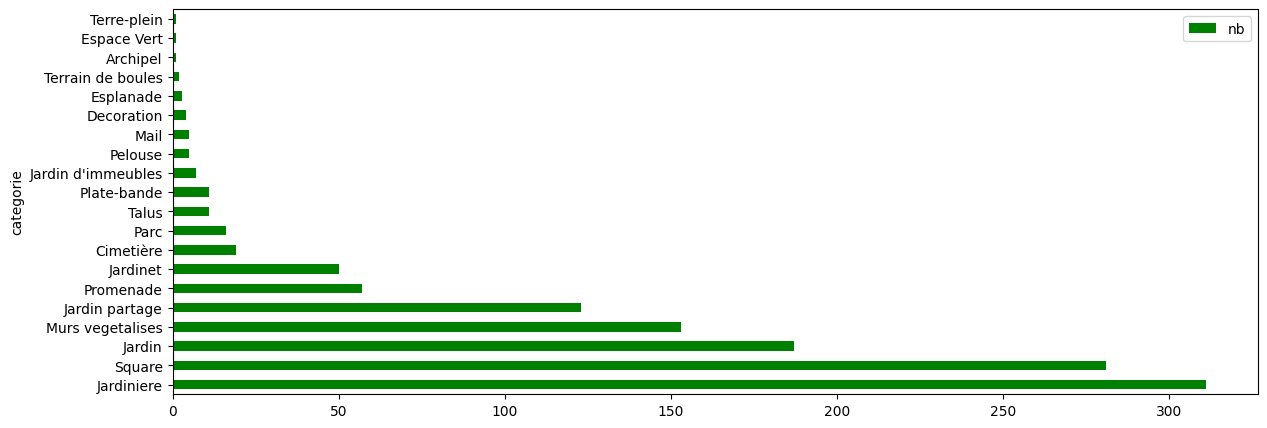

In [ ]:
# Faire un graphique
Categorie.plot(figsize =(14,5), kind="barh", color = "green")

In [ ]:
# Regrouper les espaces verts par catégorie avec comptage (GROUP BY) avec une conversion en dataframe

Categorie = EspacesvertsOk[["Arrondissement", "id"]].groupby("Arrondissement").count()
Categorie = Categorie.sort_values("Arrondissement", ascending=False)
Categorie = Categorie.rename(columns={"id": "nb"})



Categorie.head()

,nb
Arrondissement,
20,134
19,128
18,101
17,81
16,59


<Axes: xlabel='Arrondissement'>

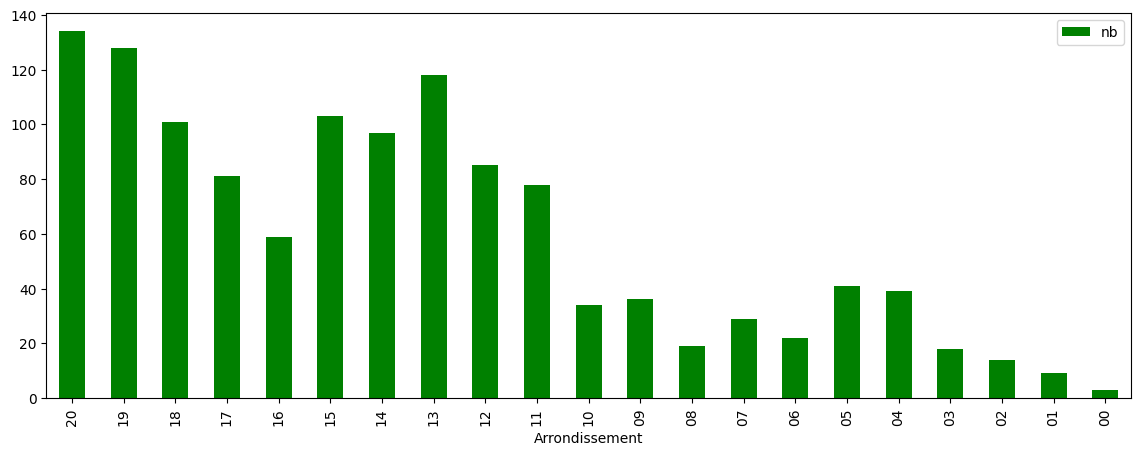

In [ ]:
# Faire un graphique
Categorie.plot(figsize =(14,5), kind="bar", color = "green")

Surface moyenne des squares : 17846.13049191024


<Axes: xlabel='categorie'>

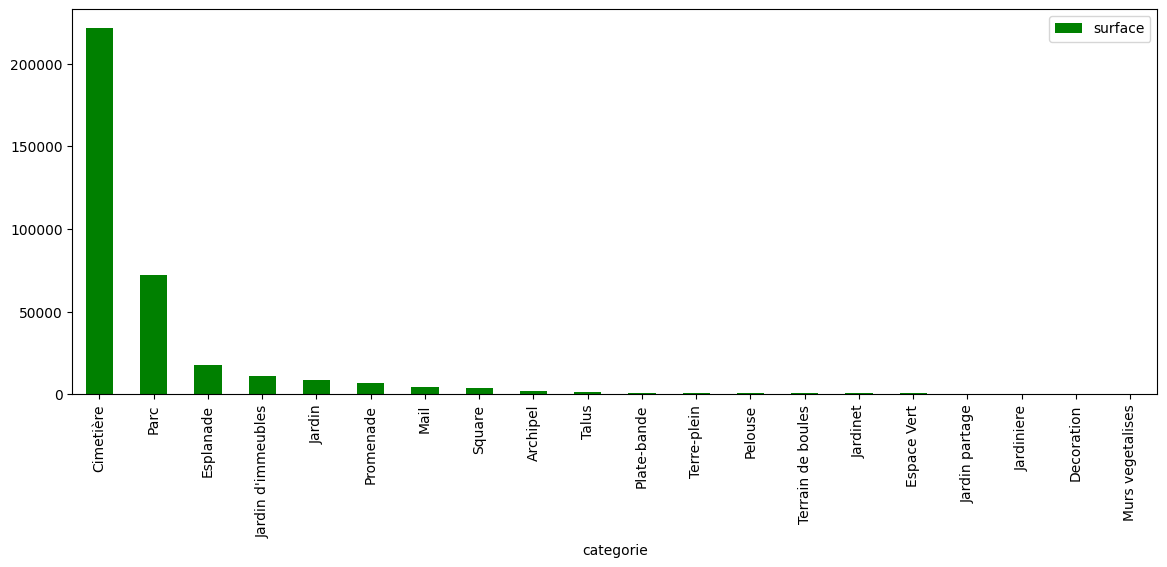

In [ ]:
# Supposons que EspacesvertsOk soit votre DataFrame

# Sélectionnez les colonnes "categorie" et "surface"
Squares = EspacesvertsOk[["categorie", "surface"]].groupby("categorie").mean()
Squares = Squares.sort_values("surface", ascending=False)
# Calculez la surface moyenne
surface_moyenne = Squares["surface"].mean()

# Affichez le résultat
print("Surface moyenne des squares :", surface_moyenne)


# Faire un graphique
Squares.plot(figsize =(14,5), kind="bar", color = "green")


<Axes: title={'center': 'surface'}, xlabel='Arrondissement'>

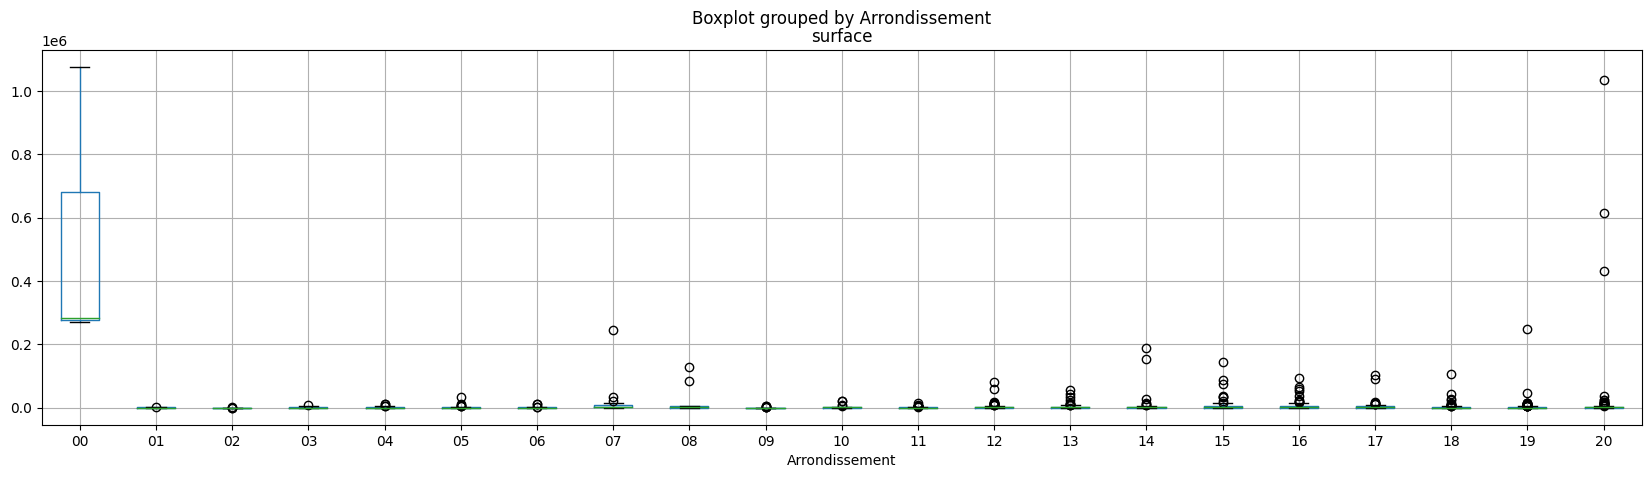

In [ ]:
#Boxplot des surfaces des espaces verts par type

EspacesvertsOk.boxplot(figsize =(20,5), column="surface", by="Arrondissement")

## Exploration de la base des arbres de Paris

### Import des données

### Préparation des données

In [ ]:
#Téléchargement des datas depuis le site opendata de Paris
!wget -O ArbresParis.csv https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/les-arbres/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B

--2024-03-08 14:59:15--  https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/les-arbres/exports/csv?lang=fr
Resolving opendata.paris.fr (opendata.paris.fr)... 34.248.20.69, 34.249.199.226
Connecting to opendata.paris.fr (opendata.paris.fr)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘ArbresParis.csv’

ArbresParis.csv         [         <=>        ]  34.84M   702KB/s    in 74s     

2024-03-08 15:00:30 (480 KB/s) - ‘ArbresParis.csv’ saved [36528728]



In [ ]:
Arbre = pd.read_csv("ArbresParis.csv", sep=';')
Arbre.head(3)

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
0,298369,Arbre,Alignement,PARIS 5E ARRDT,NaN,NaN,PLACE DE L EMIR ABDELKADER,000103001,Paulownia,Paulownia,tomentosa,NaN,100,12,Adulte,NON,"48.83970845006632, 2.35638324691167"
1,347400,Arbre,Alignement,PARIS 12E ARRDT,84,NaN,COURS DE VINCENNES,000402003,Marronnier,Aesculus,hippocastanum,NaN,45,5,Jeune (arbre)Adulte,NON,"48.847281561618786, 2.4068125559840547"
2,226247,Arbre,Alignement,BOIS DE BOULOGNE,NaN,NaN,ALLEE DU BORD DE L EAU,000301039,Platane,Platanus,x hispanica,NaN,335,30,Mature,NON,"48.87046287911342, 2.239424308398883"


In [ ]:
#Compter le nombre d'arbres

Arbre['domanialite'].size

209375

In [ ]:
#Réorganiser la table

arbresok = Arbre[["idbase", "domanialite", "arrondissement", "libellefrancais", "hauteurenm", "circonferenceencm", "remarquable", "geo_point_2d"]]
arbresok.head()

,idbase,domanialite,arrondissement,libellefrancais,hauteurenm,circonferenceencm,remarquable,geo_point_2d
0,298369,Alignement,PARIS 5E ARRDT,Paulownia,12,100,NON,"48.83970845006632, 2.35638324691167"
1,347400,Alignement,PARIS 12E ARRDT,Marronnier,5,45,NON,"48.847281561618786, 2.4068125559840547"
2,226247,Alignement,BOIS DE BOULOGNE,Platane,30,335,NON,"48.87046287911342, 2.239424308398883"
3,233763,Alignement,PARIS 9E ARRDT,NaN,5,20,NON,"48.881181718029126, 2.3407726051576954"
4,236098,Alignement,PARIS 12E ARRDT,Tilleul,10,120,NON,"48.849726698700195, 2.3681696072566583"


In [ ]:
# Renommer les champs

arbresok.rename(columns={'idbase': 'id','libellefrancais': 'type','hauteurenm': 'hauteur', 'circonferenceencm': 'circonference'}, inplace=True)
arbresok.head()

<ipython-input-160-906465659ffe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arbresok.rename(columns={'idbase': 'id','libellefrancais': 'type','hauteurenm': 'hauteur', 'circonferenceencm': 'circonference'}, inplace=True)


,id,domanialite,arrondissement,type,hauteur,circonference,remarquable,geo_point_2d
0,298369,Alignement,PARIS 5E ARRDT,Paulownia,12,100,NON,"48.83970845006632, 2.35638324691167"
1,347400,Alignement,PARIS 12E ARRDT,Marronnier,5,45,NON,"48.847281561618786, 2.4068125559840547"
2,226247,Alignement,BOIS DE BOULOGNE,Platane,30,335,NON,"48.87046287911342, 2.239424308398883"
3,233763,Alignement,PARIS 9E ARRDT,NaN,5,20,NON,"48.881181718029126, 2.3407726051576954"
4,236098,Alignement,PARIS 12E ARRDT,Tilleul,10,120,NON,"48.849726698700195, 2.3681696072566583"


<Axes: ylabel='Frequency'>

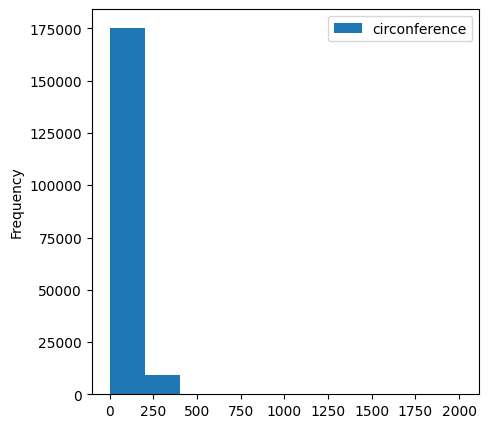

In [ ]:
arbresok.plot.hist(y='circonference', figsize=(5, 5))

<Axes: ylabel='Frequency'>

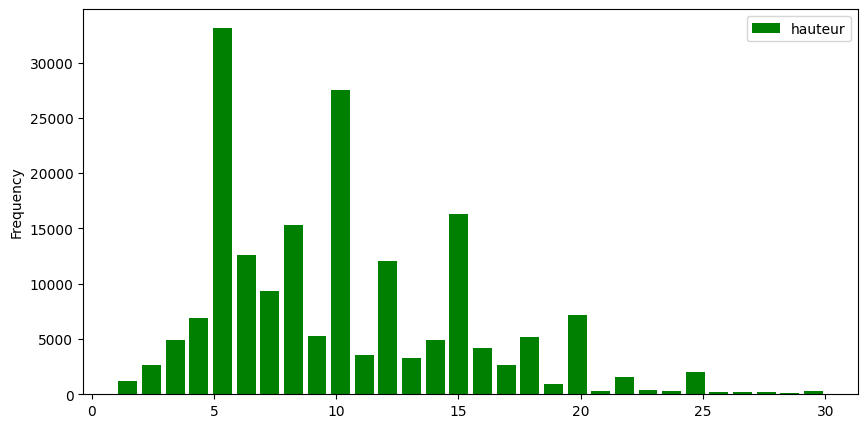

In [ ]:
#Nettoyer le jeu de données des valeurs abérantes (moins de 30m)

arbresok = arbresok[(arbresok["hauteur"] <=30)]
arbresok = arbresok[(arbresok["hauteur"] >0)]
arbresok
arbresok.plot.hist(y='hauteur', figsize=(10, 5), bins= 30, color = 'green', rwidth=0.8)

<Axes: ylabel='Frequency'>

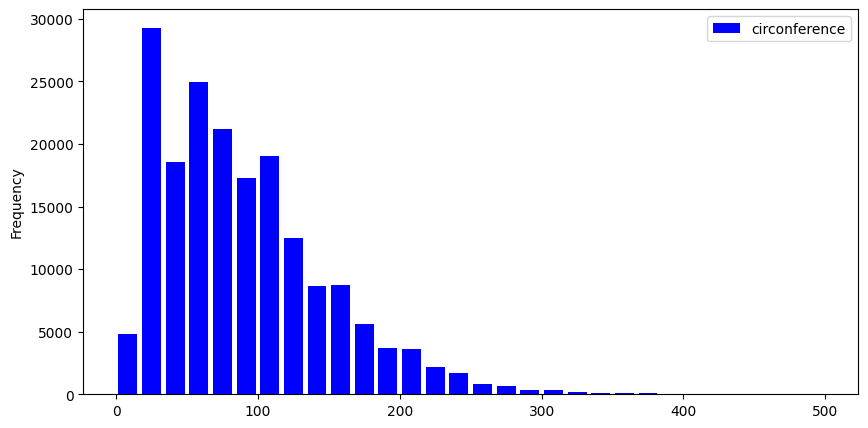

In [ ]:
arbresok = arbresok[(arbresok["circonference"] <=500)]
arbresok
arbresok.plot.hist(y='circonference', figsize=(10, 5), bins= 30, color = 'blue', rwidth=0.8)

<Axes: xlabel='hauteur', ylabel='circonference'>

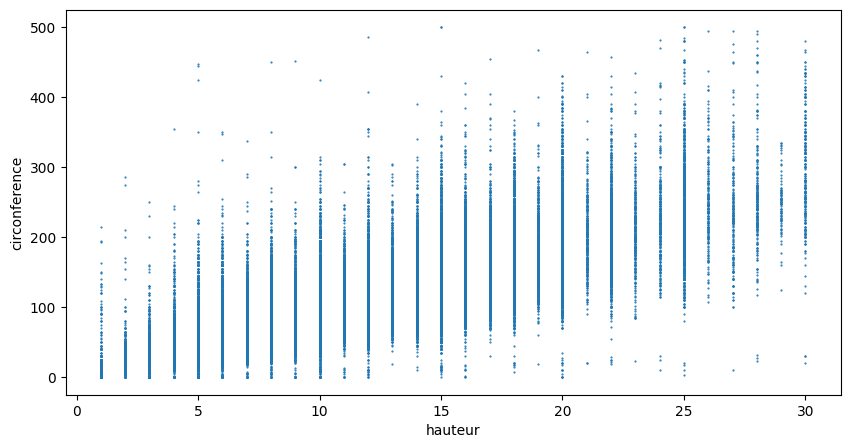

In [ ]:
# Faire un scatterplot qui met en relation la hauteur et la circonférence des arbres

arbresok.plot.scatter(x='hauteur', y ="circonference", figsize=(10, 5), s=0.3)

,id
arrondissement,
PARIS 16E ARRDT,16992
PARIS 13E ARRDT,16523
PARIS 20E ARRDT,14971
PARIS 15E ARRDT,12978
PARIS 19E ARRDT,12638


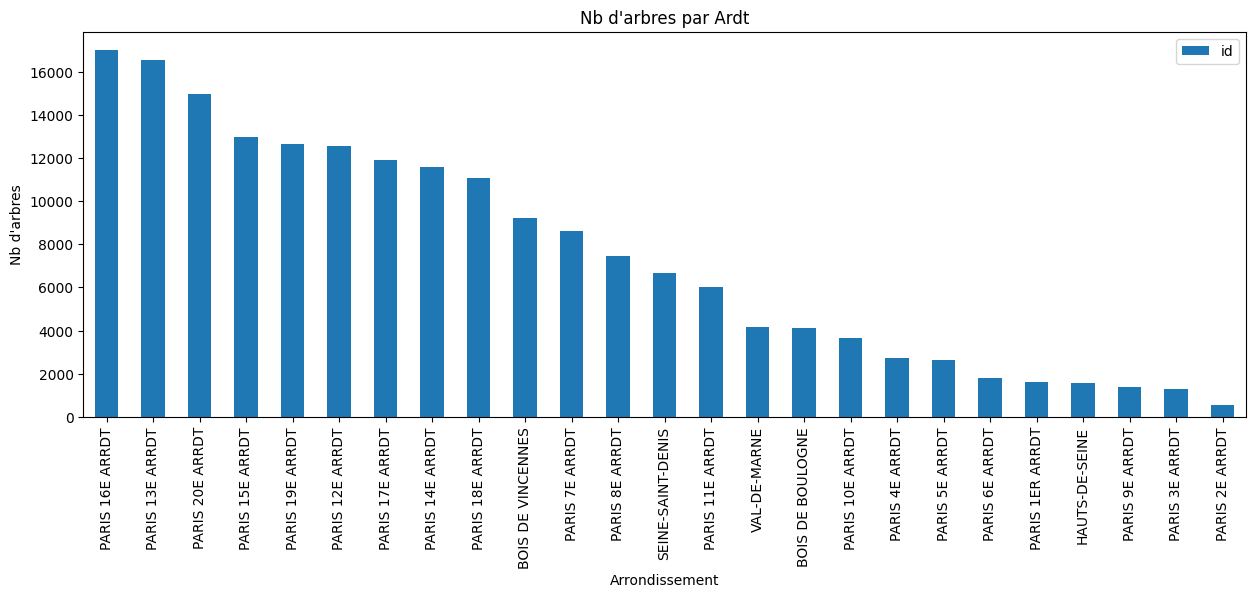

In [ ]:
#Compter le nombre d'arbres par arrondissement

ArbresARDT = arbresok[["arrondissement", "id"]].groupby("arrondissement").count()
ArbresARDT = ArbresARDT.sort_values("id", ascending=False)

ArbresARDT.plot(figsize =(15,5), kind="bar")
plt.title("Nb d'arbres par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Nb d'arbres")
ArbresARDT.head()

In [ ]:
#Compter le nombre d'arbres par arrondissement

ArbresARDT = arbresok[["arrondissement", "id"]].groupby("arrondissement").count()
ArbresARDT = ArbresARDT.sort_values("id", ascending=False)

ArbresARDT.plot(figsize =(15,5), kind="bar")
plt.title("Nb d'arbres par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Nb d'arbres")
ArbresARDT.head()

,id
remarquable,
NON,178714
OUI,153


In [ ]:

agregg = arbresok.groupby(['domanialite','arrondissement' ])[['hauteur', 'circonference']].agg(['count', 'min'])
# Réorganisez les niveaux pour accéder à la colonne 'count'
agregg = agregg.sort_values(('hauteur', 'count'), ascending=False)
agregg.head(20)

#count
#hauteur moy
#circon moy

hauteur     circonference    
                                count min         count min
domanialite arrondissement                                 
Alignement  PARIS 13E ARRDT     11183   2         11183   5
            PARIS 16E ARRDT     10708   1         10708  10
            PARIS 15E ARRDT      8509   1          8509   2
            PARIS 12E ARRDT      7943   2          7943   3
            PARIS 19E ARRDT      7819   1          7819   4
            PARIS 14E ARRDT      7085   1          7085   4
            PARIS 17E ARRDT      6169   2          6169   2
            PARIS 7E ARRDT       6096   1          6096   5
CIMETIERE   SEINE-SAINT-DENIS    6058   1          6058   5
Alignement  PARIS 8E ARRDT       6001   1          6001   3
            PARIS 20E ARRDT      5600   2          5600   5
            BOIS DE VINCENNES    5492   1          5492   2
            PARIS 18E ARRDT      5270   1          5270   3
            PARIS 11E ARRDT      4426   2          4426   5
CIMETIERE   VAL-DE-MARNE         4151   1          4151   3
Alignement  BOIS DE BOULOGNE     4075   2          4075   2
CIMETIERE   PARIS 20E ARRDT      3991   1          3991   5
Jardin      PARIS 17E ARRDT      3936   1          3936   6
            BOIS DE VINCENNES    3745   1          3745   0
            PARIS 16E ARRDT      3677   1          3677   3

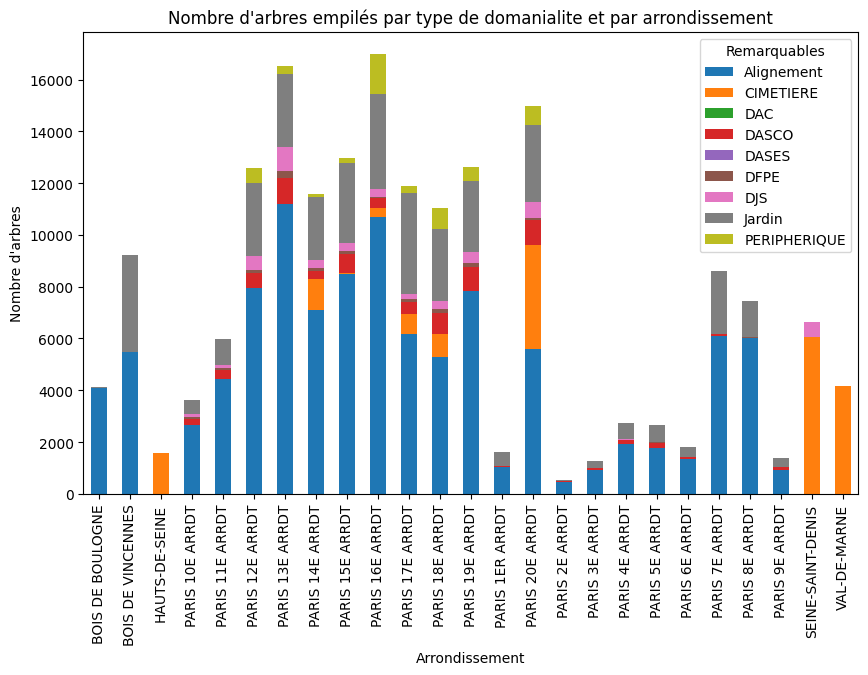

In [ ]:
# Compter le nombre de modalités pour chaque arrondissement et remarquable
tableau_croise = arbresok.groupby[('arrondissement', 'domanialite')].size().unstack(fill_value=0)



# Grouper le DataFrame par arrondissement et domanialite, puis compter le nombre d'arbres dans chaque groupe
counts = arbresok.groupby(['arrondissement', 'domanialite']).size().unstack(fill_value=0)

# Plot
counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Titre et étiquettes des axes
plt.title('Nombre d\'arbres empilés par type de domanialite et par arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Nombre d\'arbres')

# Légende
plt.legend(title='Remarquables')

# Affichage du graphique
plt.show()


In [ ]:
agregg.to_excel('agregation.xlsx')